In [1]:
import numpy as np
np.random.seed(5) 
import matplotlib.pyplot as plt
%matplotlib inline


train_dir = "./ASL_Alphabet_Dataset/asl_alphabet_train"
test_dir = "./ASL_Alphabet_Dataset/asl_alphabet_test"


In [19]:
import os
import cv2
import numpy as np

def load_images_train(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            print(filepath)
            print(idx)
            print(label)
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)


def load_images_test(directory):
    X_eval = []  
    y_eval = []  

    for file_name in os.listdir(directory): 
        file_path = os.path.join(directory, file_name)
        if os.path.isfile(file_path):  
            image = cv2.imread(file_path)
            image = cv2.resize(image, (64, 64))
            X_eval.append(image)
            y_eval.append(file_name)
            print(f"Loaded: {file_path}")

    X_eval = np.array(X_eval)
    y_eval = np.array(y_eval)
    
    print("Number of images loaded:", len(X_eval))
    
    return X_eval, y_eval

In [3]:
import keras

uniq_labels = sorted(os.listdir(train_dir))

images, Labels = load_images_train(directory = train_dir) 

X_eval, y_eval = load_images_test(directory = test_dir)
    


./ASL_Alphabet_Dataset/asl_alphabet_train/A/1.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/10.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/100.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/101.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/102.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/103.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/104.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/105.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/106.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/107.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/108.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/109.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/11.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/110.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/111.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/112.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/113.jpg
0
A
./ASL_Alphabet_Dataset/asl_alphabet_train/A/114.jpg


Outputs

In [52]:
print(uniq_labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [4]:
from sklearn.model_selection import train_test_split

print(images.shape)

X_train, X_test, y_train, y_test = train_test_split(images, Labels, test_size = 0.1, stratify = Labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)


(21050, 64, 64, 3)
Total number of symbols:  29
Number of training images:  18945
Number of testing images:  2105


In [5]:
def print_images(image_list, label, size):
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))
    
    tmp2 = -1
    num = 1
    tmp = 1
    while tmp < size:
        if tmp2 != label[tmp]:
            ax = plt.subplot(rows, cols, num)
            plt.imshow(image_list[tmp])
            plt.title(uniq_labels[label[tmp]])
            ax.title.set_fontsize(20)
            ax.axis('off')
            tmp2 = label[tmp]
            num += 1
        tmp += 20
        
    plt.show()

Training Images: 


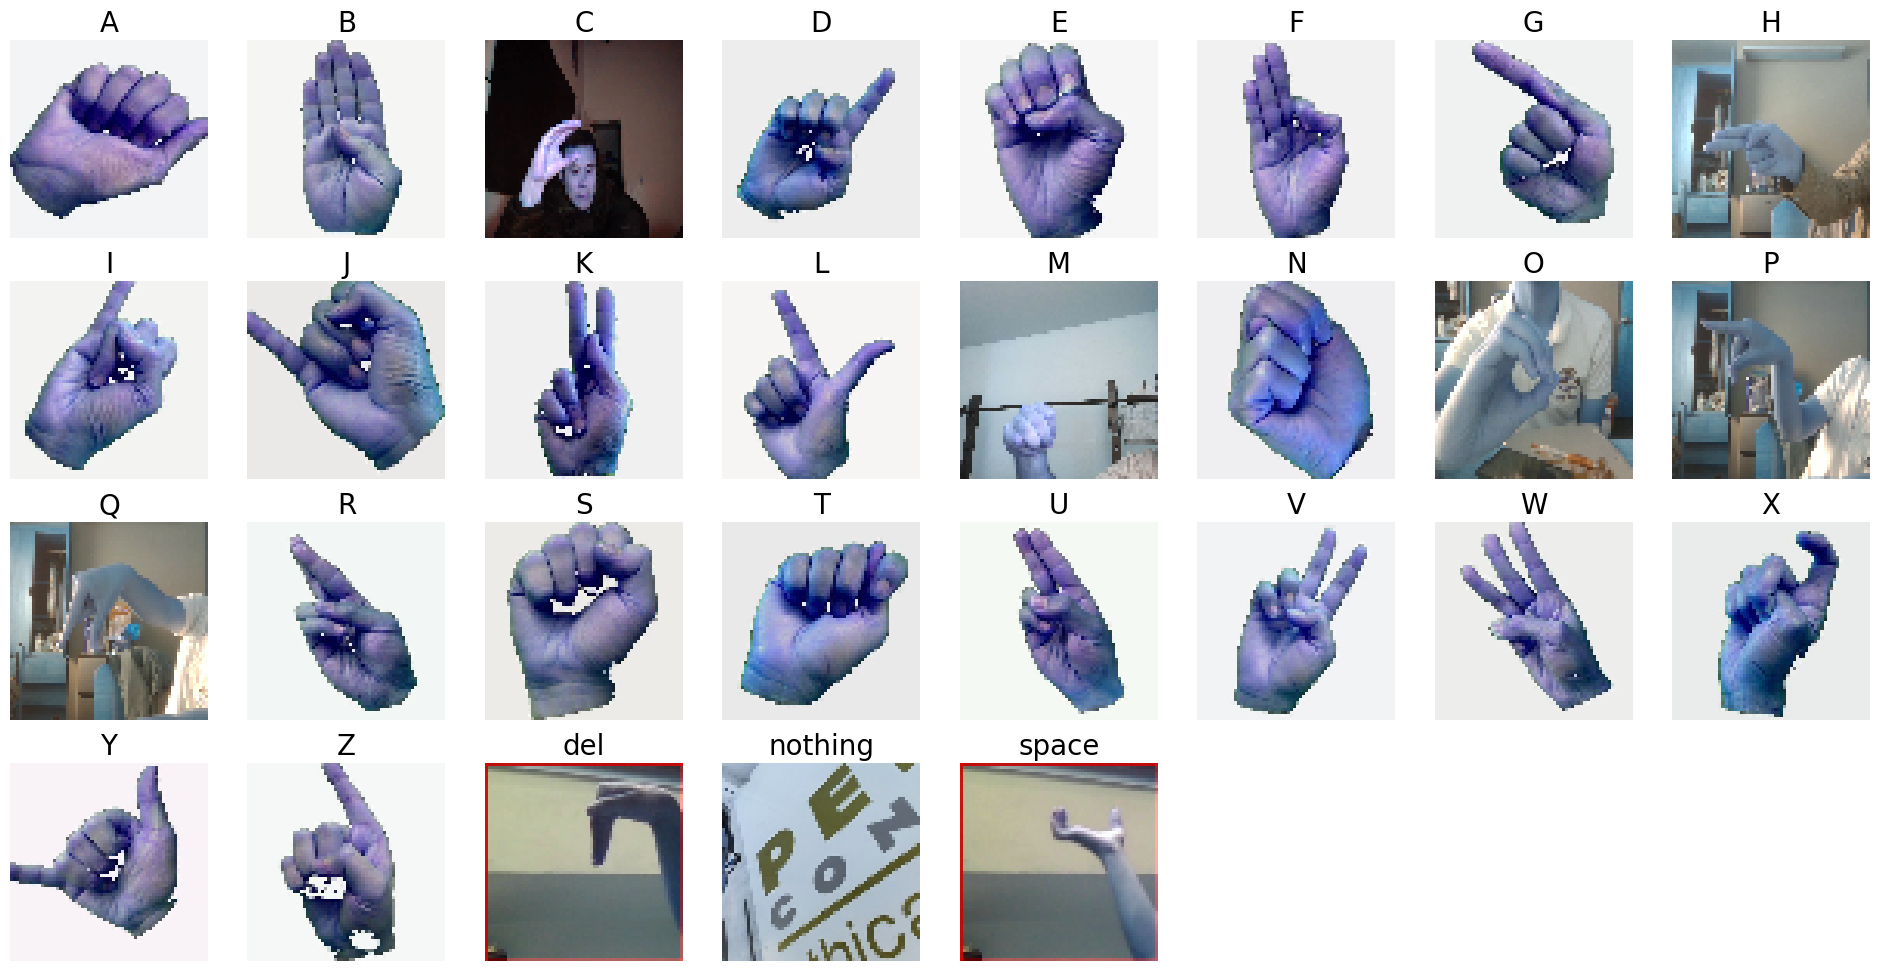

In [6]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train, label=y_train, size=18945)

Testing images: 


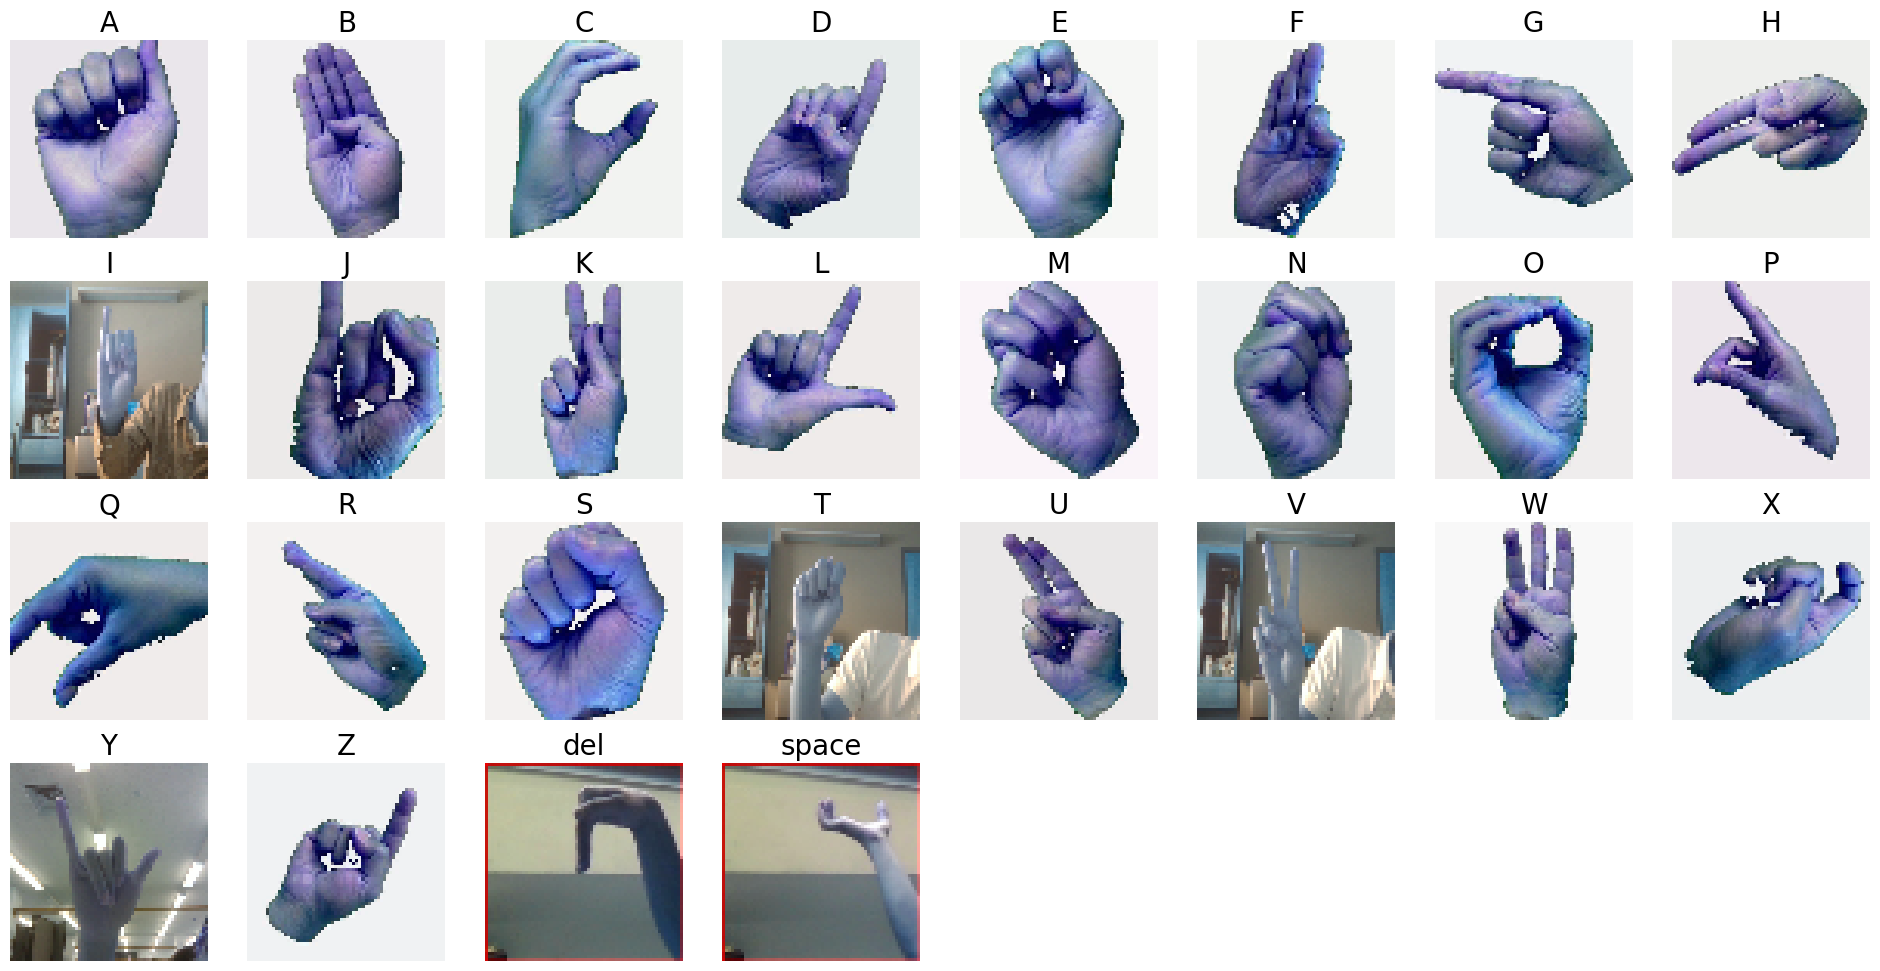

In [7]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test, label = y_test, size = 2105)

In [8]:
print(X_train)
print(X_train.shape)


[[[[239 237 236]
   [239 237 236]
   [239 237 236]
   ...
   [239 237 236]
   [239 237 236]
   [239 237 236]]

  [[239 237 236]
   [239 237 236]
   [239 237 236]
   ...
   [239 237 236]
   [239 237 236]
   [239 237 236]]

  [[239 237 236]
   [239 237 236]
   [239 237 236]
   ...
   [239 237 236]
   [239 237 236]
   [239 237 236]]

  ...

  [[239 237 236]
   [239 237 236]
   [239 237 236]
   ...
   [239 237 236]
   [239 237 236]
   [239 237 236]]

  [[239 237 236]
   [239 237 236]
   [239 237 236]
   ...
   [239 237 236]
   [239 237 236]
   [239 237 236]]

  [[239 237 236]
   [239 237 236]
   [239 237 236]
   ...
   [239 237 236]
   [239 237 236]
   [239 237 236]]]


 [[[242 244 245]
   [242 244 245]
   [242 244 245]
   ...
   [242 244 245]
   [242 244 245]
   [242 244 245]]

  [[242 244 245]
   [242 244 245]
   [242 244 245]
   ...
   [242 244 245]
   [242 244 245]
   [242 244 245]]

  [[242 244 245]
   [242 244 245]
   [242 244 245]
   ...
   [242 244 245]
   [242 244 245]
   [242 244

modeling

In [9]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=29)
y_test = to_categorical(y_test, num_classes=29)

In [10]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [11]:
X_train.shape

(18945, 64, 64, 3)

Defining the Model

In [12]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Model

input_shape = (64, 64, 3)

input_layer = Input(shape=input_shape)
x = Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(input_layer)
x = Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Dropout(0.5)(x) #prevents overfitting
x = Conv2D(filters=128, kernel_size=5, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=5, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Dropout(0.5)(x)
x = Conv2D(filters=256, kernel_size=5, padding='same', activation='relu')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
output_layer = Dense(29, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Print model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 29)             │       118,813 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,660,253 (6.33 MB)

 Trainable params: 1,660,253 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [13]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
hist = model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 1261s 4s/step - accuracy: 0.1054 - loss: 3.0927
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 979s 3s/step - accuracy: 0.7478 - loss: 0.7993
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 726s 2s/step - accuracy: 0.8788 - loss: 0.3821
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 888s 3s/step - accuracy: 0.9155 - loss: 0.2757
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 1021s 3s/step - accuracy: 0.9372 - loss: 0.2047


In [15]:
loss, accuracy = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(accuracy*100, 3), '%')
print('Loss for test images:', loss)

Accuracy for test images: 97.767 %
Loss for test images: 0.09807455539703369


Predictions on Testing Data

In [48]:
predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)

print("actual => predicted")

for i, j in zip(predicted_labels, range(y_test.shape[0])):
    print(uniq_labels[i], "  =>  ", uniq_labels[np.argmax(y_test[j])])
    

66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 362ms/step
actual => predicted
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
M   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
M   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
A   =>   A
B   =>   B
B   =>   B
B   =>   B
B   =>   B
B   =>   B
B  

Model Evaluation

Accuracy: 0.9776722090261283
Precision: 0.9784505397699715
Recall: 0.9776722090261283
F1 Score: 0.9775129183908281


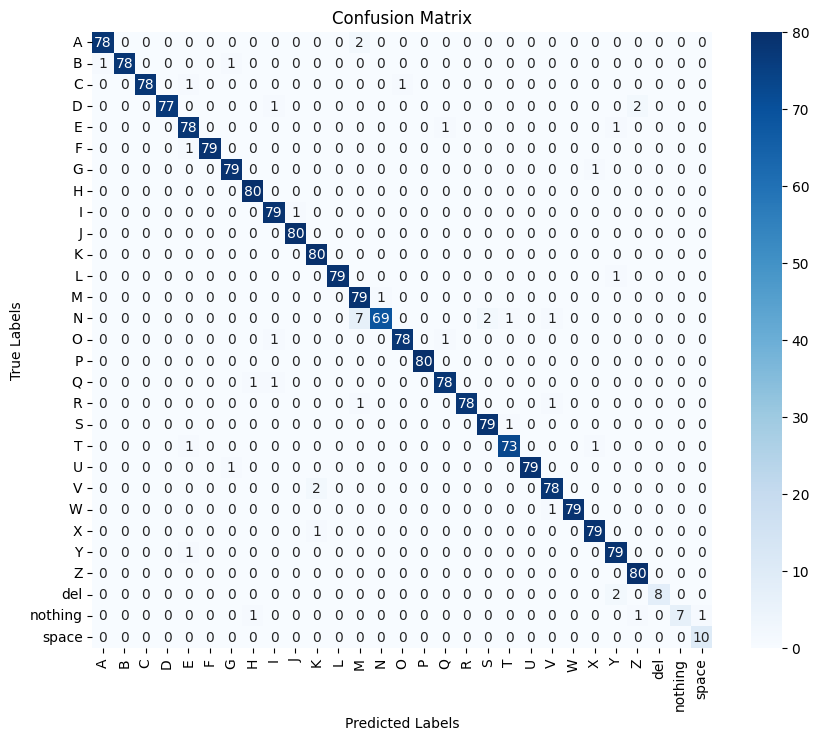

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_labels)
precision = precision_score(np.argmax(y_test, axis=1), predicted_labels, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), predicted_labels, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), predicted_labels, average='weighted')
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=uniq_labels, yticklabels=uniq_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Exporting the Model

In [59]:
# pickeling error 

# import joblib
# 
# joblib.dump(model, "ASL_model.pkl")


model.save_weights("ASL_model.weights.h5")

In [56]:
for i in range(X_test[0].shape[0]):
    print(X_test[0][i], end=", ")

[[0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94509804]
 [0.93333334 0.9411765  0.94